# Henon-Heiles System

# Equation of Motion

For coordinates x and y the potential is (V(x,y)) is given by,

$ V(x,y) = \frac{1}{2} (x^2 + y^2 + 2x^2y-2y^3/3) $

These are the derived equations of motion, by applying Lagran's equations:

$ \ddot{x} = -(x + 2xy) $ 
<br>
$ \ddot{y} = -(y + x^2 - y^2) $ 

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Define the time step and total number of steps
t = np.linspace(0, 10.0, 10000)
dt = t[1]-t[0] # Time step
N = t.size  # Number of steps

# Initialize arrays to store x, y, vx (x'), and vy (y') values
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)



# Function to calculate accelerations
def accelerations(x, y):
    ax = -(x + 2*x*y)
    ay = -(y + x**2 - y**2)
    return ax, ay

# Initial Conditions

There are 4 conditions: Coordinates (x, y), velocity in y direction ($\dot{y}$) and total energy (E) at t=0.
initial velocity in x direction ($\dot{x}$) is calculated using E that is given by

$ E = V(x,y) + \frac{\dot{x}^2 + \dot{y}^2}{2} $

In [65]:
t = np.linspace(0, 10.0, 10000)
dt = t[1]-t[0] # Time step
N = t.size  # Number of steps

# Initial conditions
x0 = 0  # Initial x position
y0 = 0.5 # Initial y position
vy0 = 0.0  # Initial y velocity
E = 1/3  # Total energy of the system

vx0 = np.sqrt(2*E-(y[0]**2-2*y[0]**3/3))  # Initial y velocity

# Integration

The 3 numerical methods (Heun's, Simplectic Euler, Stormer-Verlet) are defined in the class Integrator as shown below. 

In [66]:
class Integrator:
    def __init__(self, method='verlet', dt=dt, N=N):
        self.method = method
        self.dt = dt
        self.N = N
        self.x = np.zeros(N)   # array to store the x positions
        self.y = np.zeros(N)   # array to store the y positions
        self.vx = np.zeros(N)  # array to store the x velocities
        self.vy = np.zeros(N)  # array to store the y velocities 
    
    def set_initial_conditions(self, x0, y0, vx0, vy0):
        self.x[0] = x0
        self.y[0] = y0
        self.vx[0] = vx0
        self.vy[0] = vy0
    
    def accelerations(self, x, y):
        ax = -(x + 2*x*y)
        ay = -(y + x**2 - y**2)
        return ax, ay
    
    def integrate(self):
        if self.method == 'verlet':
            self.verlet_integration()
        elif self.method == 'heun':
            self.heun_integration()
        elif self.method == 'symplectic_euler':
            self.symplectic_euler_integration()
        else:
            raise ValueError("Unsupported integration method.")
    
    def verlet_integration(self):
        for i in range(self.N-1):
            ax, ay = self.accelerations(self.x[i], self.y[i])
            self.x[i+1] = self.x[i] + self.vx[i]*self.dt + 0.5*ax*self.dt**2
            self.y[i+1] = self.y[i] + self.vy[i]*self.dt + 0.5*ay*self.dt**2
            ax_new, ay_new = self.accelerations(self.x[i+1], self.y[i+1])
            self.vx[i+1] = self.vx[i] + 0.5*(ax + ax_new)*self.dt
            self.vy[i+1] = self.vy[i] + 0.5*(ay + ay_new)*self.dt

    def heun_integration(self):
        for i in range(self.N-1):
            ax, ay = self.accelerations(self.x[i], self.y[i])
            x_predictor = self.x[i] + self.vx[i]*self.dt
            y_predictor = self.y[i] + self.vy[i]*self.dt
            ax_pred, ay_pred = self.accelerations(x_predictor, y_predictor)
            self.vx[i+1] = self.vx[i] + 0.5*(ax + ax_pred)*self.dt
            self.vy[i+1] = self.vy[i] + 0.5*(ay + ay_pred)*self.dt
            self.x[i+1] = self.x[i] + 0.5*(self.vx[i] + self.vx[i+1])*self.dt
            self.y[i+1] = self.y[i] + 0.5*(self.vy[i] + self.vy[i+1])*self.dt

    def symplectic_euler_integration(self):
        for i in range(self.N-1):
            ax, ay = self.accelerations(self.x[i], self.y[i])
            self.vx[i+1] = self.vx[i] + ax*self.dt
            self.vy[i+1] = self.vy[i] + ay*self.dt
            self.x[i+1] = self.x[i] + self.vx[i+1]*self.dt
            self.y[i+1] = self.y[i] + self.vy[i+1]*self.dt
    

    # Return the phase space coordinates
    def phase_space(self):

        return self.x, self.y, self.vx, self.vy
    

    def plot_trajectory(self):

        fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust for 2 rows and 3 columns

        # x vs. y plot for trajectory
        axs[0, 0].plot(self.x, self.y, color='darkorange')
        axs[0, 0].set_title(f'Orbit using {self.method.capitalize()} Integration')
        axs[0, 0].set_xlabel('x')
        axs[0, 0].set_ylabel('y')
        axs[0, 0].axis('equal')  # Ensuring aspect ratio is equal to see circular path clearly
        axs[0, 0].grid(True)
        

        # Plot for x position
        axs[0, 1].plot(t, self.x, color='blue')
        axs[0, 1].set_title('Position x(t)')
        axs[0, 1].set_xlabel('Time')
        axs[0, 1].set_ylabel('x')
        axs[0, 1].grid(True)
       

        # Plot for x velocity
        axs[0, 2].plot(t, self.vx, color='green')
        axs[0, 2].set_title('Velocity x\'(t)')
        axs[0, 2].set_xlabel('Time')
        axs[0, 2].set_ylabel(r'$V_{x}$')
        axs[0, 2].grid(True)
     

        # Plot for y position
        axs[1, 0].plot(self.vy, self.y, color='black')
        axs[1, 0].set_title('y-Py')
        axs[1, 0].set_xlabel('Py')
        axs[1, 0].set_ylabel('y')
        axs[1, 0].grid(True)
        


        # Plot for y position
        axs[1, 1].plot(t, self.y, color='red')
        axs[1, 1].set_title('Position y(t)')
        axs[1, 1].set_xlabel('Time')
        axs[1, 1].set_ylabel('Position y')
        axs[1, 1].grid(True)
        

        # Plot for y velocity
        axs[1, 2].plot(t, self.vy, color='purple')
        axs[1, 2].set_title('Velocity y\'(t)')
        axs[1, 2].set_xlabel('Time')
        axs[1, 2].set_ylabel('Velocity y\'')
        axs[1, 2].grid(True)
        

        plt.tight_layout()
        plt.show()
    
    # Function to animate the trajectory (x an y corrdinates)
    def animate_trajectory(self):
        fig, ax = plt.subplots()

        ax.set_title(f'Orbit using {self.method.capitalize()} Integration')
        ax.set_xlim((np.min(self.x)-1, np.max(self.x)+1))
        ax.set_ylim((np.min(self.y)-1, np.max(self.y)+1))
        ax.set_xlabel('x')
        ax.set_ylabel('y')

        line, = ax.plot([], [], lw=2)
        
        def init():
            line.set_data([], [])
            return line,
        
        def update(frame):
            line.set_data(self.x[:frame], self.y[:frame])
            
            return line,
        
        ani = FuncAnimation(fig, update, frames=range(1, self.N, 100),
                            init_func=init, blit=False, interval=20)
        plt.close(fig)
        return ani




# Visualization

## Verlet Integration

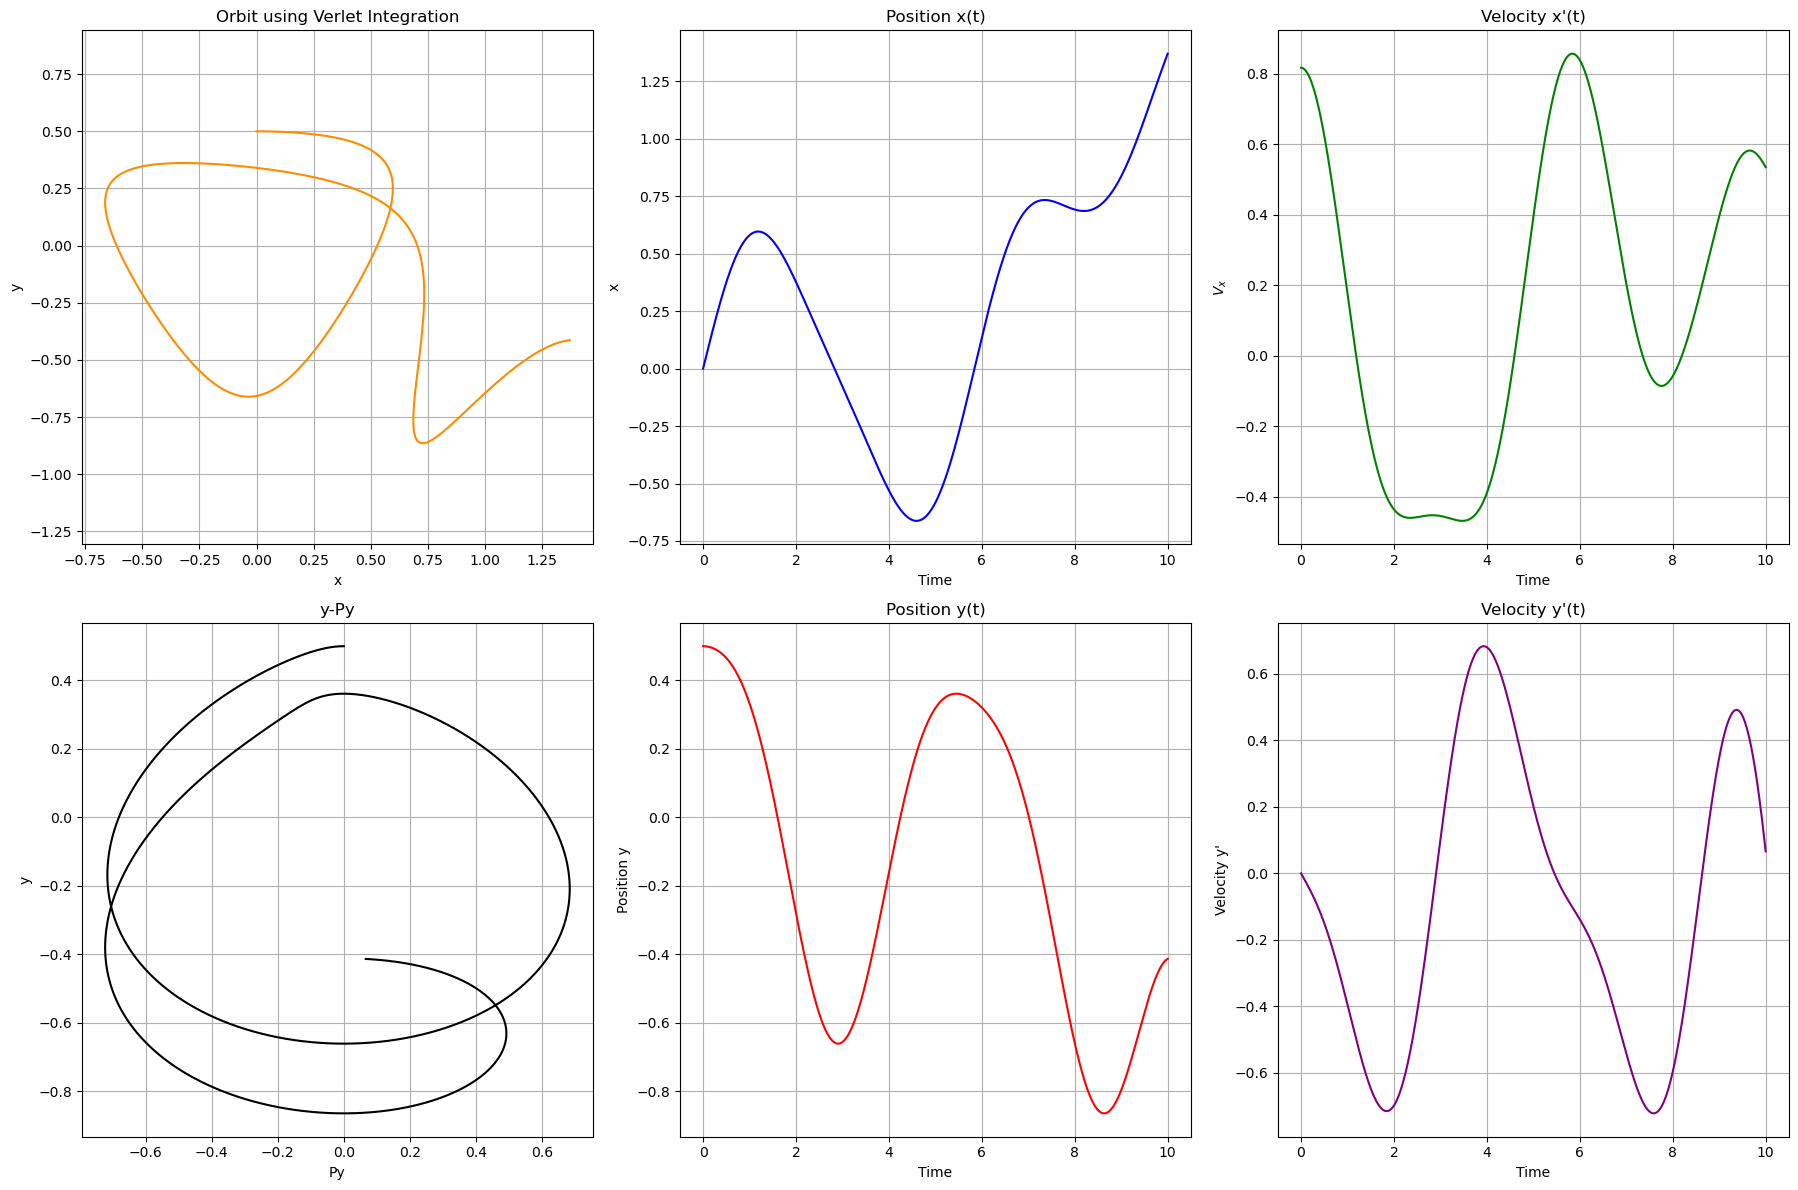

In [67]:
# Usage example with Verlet Integration
integrator = Integrator(method='verlet', dt=dt, N=N)
integrator.set_initial_conditions(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
integrator.integrate()

x_ar, y_ar, vx_ar, vy_ar = integrator.phase_space()
integrator.plot_trajectory()
anime = integrator.animate_trajectory()

# To display the animation in a Jupyter notebook (optional)
HTML(anime.to_jshtml())

In [57]:
x_ar, y_ar.size

(array([0.00000000e+00, 5.77408010e-04, 1.15481486e-03, ...,
        1.51223413e+00, 1.51324140e+00, 1.51424998e+00]),
 10000)

## Heun's Method

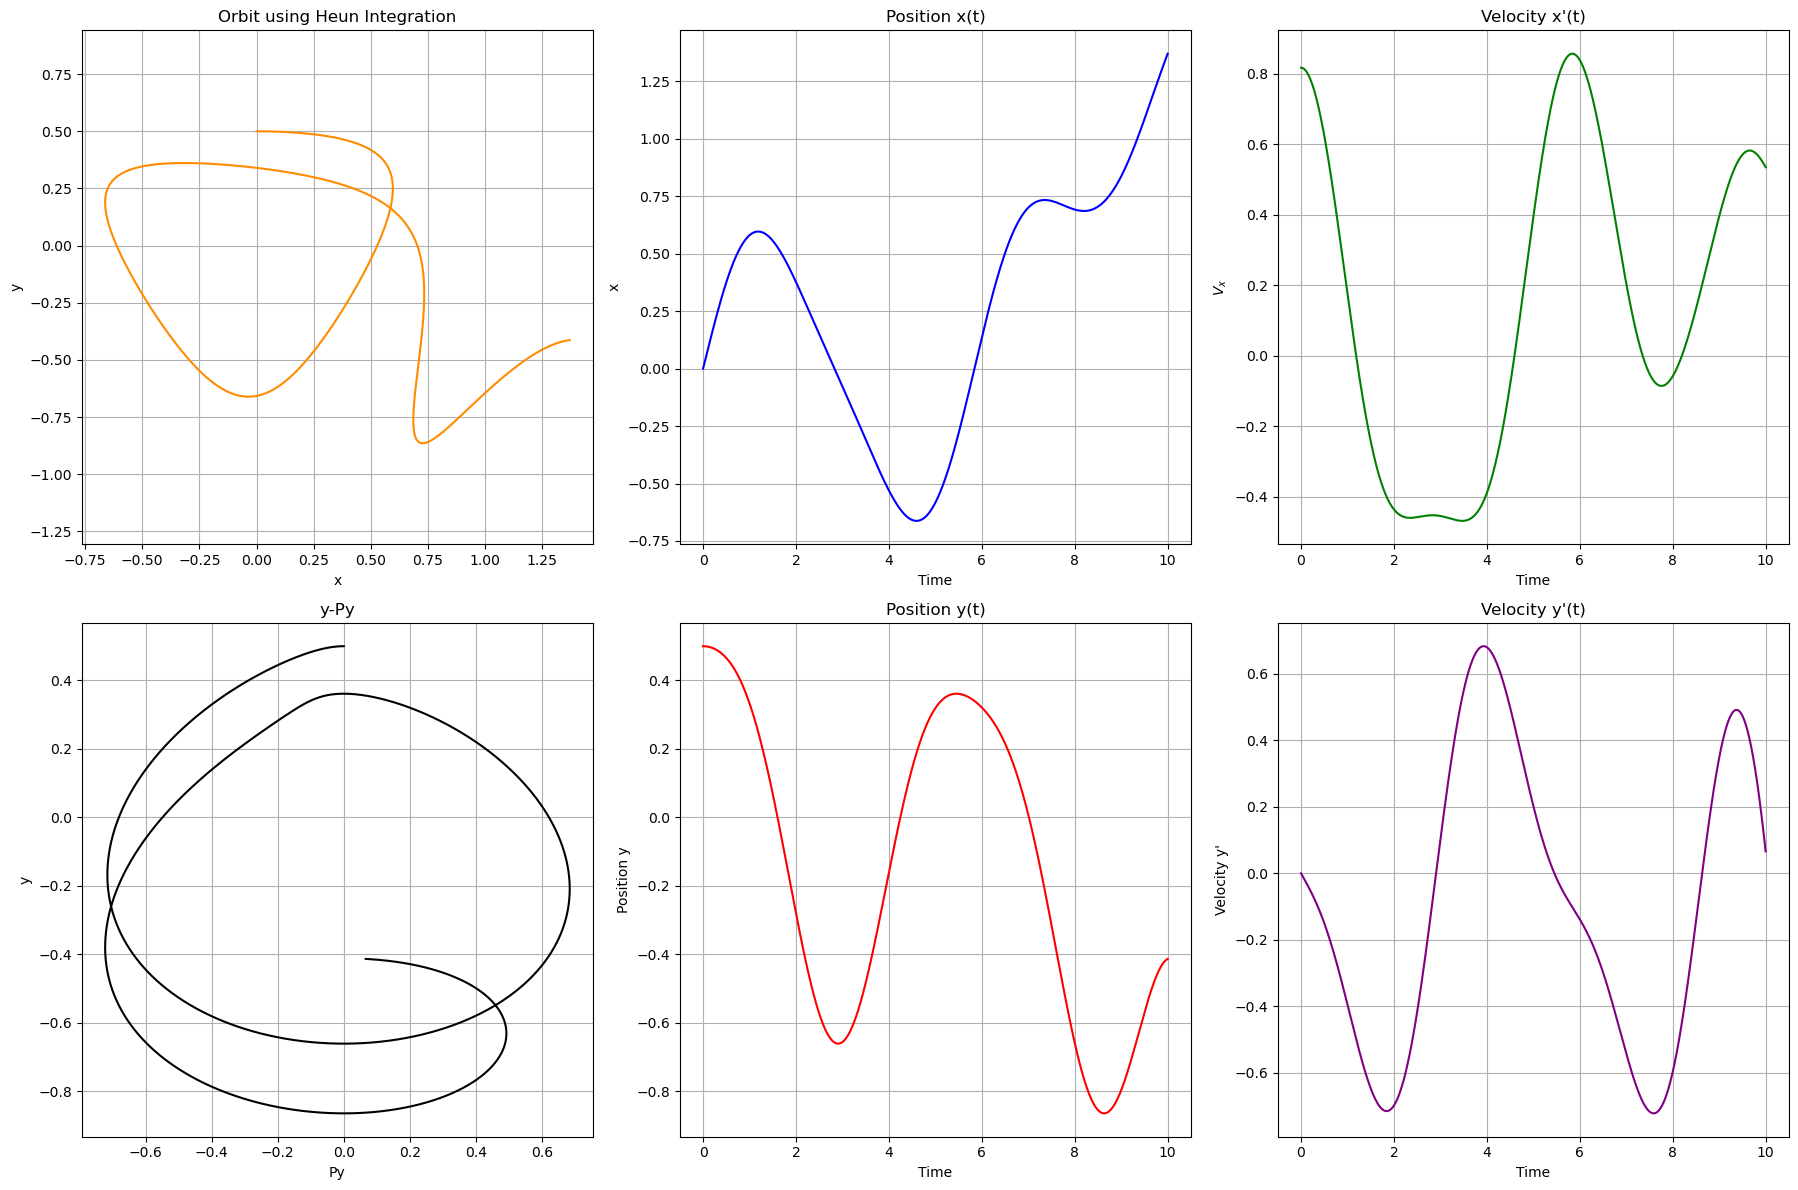

In [68]:
# Usage example with Verlet Integration
integrator = Integrator(method='heun', dt=dt, N=N)
integrator.set_initial_conditions(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
integrator.integrate()
integrator.plot_trajectory()
anime = integrator.animate_trajectory()

# To display the animation in a Jupyter notebook (optional)
HTML(anime.to_jshtml())

# Varying Initial Conditions

In [110]:
import matplotlib.pyplot as plt

def vel_x(x,y, vel_y, E):
    V = (x**2 + y**2 + (2*x**2)*y-(2/3)*y**3)/2
    return np.sqrt(2*(E-V)-vel_y**2)

# Define a function to run the integrator and plot results for different initial conditions

def compare_trajectories(integrator_class, initial_conditions, dt=dt, N=N, method='verlet',constraint=4):
    plt.figure(figsize=(8, 8))
    for x0, y0, vy0, E in initial_conditions:
        # Initialize the integrator with specified method, dt, and N
        vx0 = vel_x(x0, y0, vy0, E)
        
        integrator = Integrator(method=method, dt=dt, N=N)
        integrator.set_initial_conditions(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
        integrator.integrate()
        c_x, c_y, p_x, p_y = integrator.phase_space()

        if constraint == 4:
            var = E
            name = 'Energy'

        elif constraint == 3:
            var = vy0
            name = 'Vy0'

        elif constraint == 2:
            var = y0
            name = 'Y0'

        elif constraint == 1:
            var = x0
            name = 'X0'
         
        # Plot the trajectory
        plt.plot(c_x, c_y, label='%.2f'%var)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Trajectories for Different Initial Conditions\n(Method: {method.capitalize()}, Variable: {name})')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

/tmp/ipykernel_21246/1851958519.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(E-V)-vel_y**2)


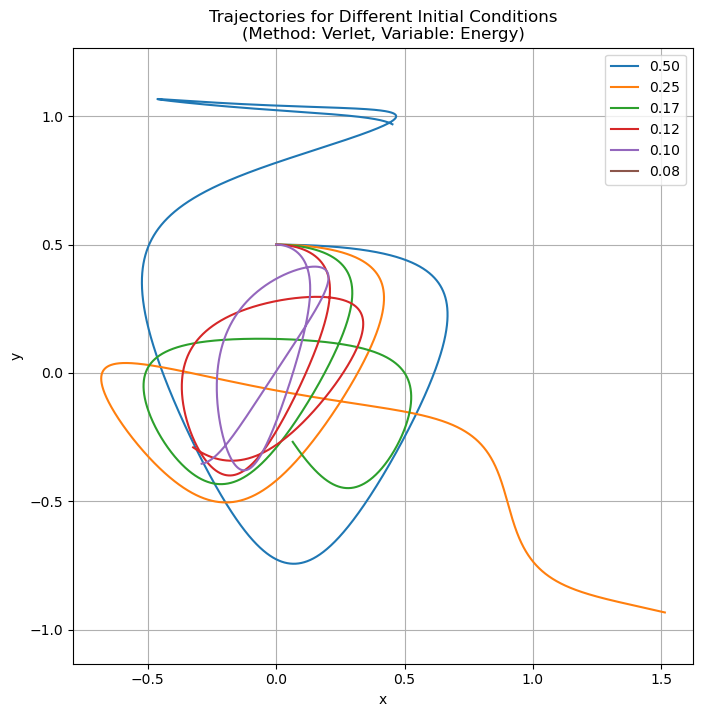

In [111]:
# Varying the total energy E and keeping other conditions constant.

initial_conditions = [(0.0,0.5,0.0,1/x) for x in range(2,13,2)]


compare_trajectories(Integrator, initial_conditions, method='verlet',constraint=4)

/tmp/ipykernel_21246/1851958519.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(E-V)-vel_y**2)


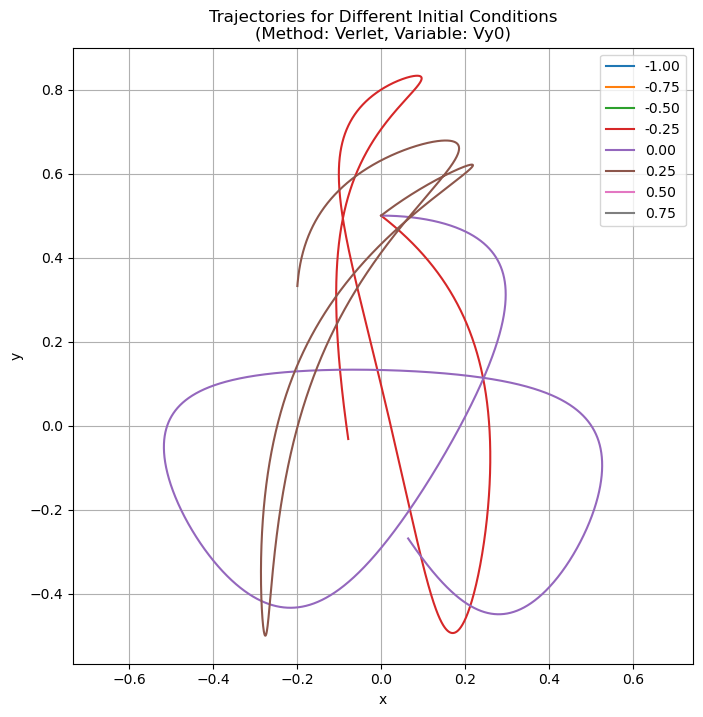

In [122]:
# Varying the velocity vy and keeping other conditions constant.

initial_conditions = [(0.0,0.5,x,1/6) for x in np.arange(-1,1,0.25)]


compare_trajectories(Integrator, initial_conditions, method='verlet',constraint=3)


# Comparing Integration Methods:


In [120]:
x0, y0, vy0, E = 0.0,0.5,0.0,1/6

vx0 = vel_x(x0, y0, vy0, E) 

int_methods = ['verlet', 'heun', 'symplectic_euler']

def compare_integrators(integrator_class, dt=dt, N=N):
    plt.figure(figsize=(8, 8))
    
    for method in int_methods:
        integrator = Integrator(method=method, dt=dt, N=N)
        integrator.set_initial_conditions(x0=x0, y0=y0, vx0=vx0, vy0=vy0)
        integrator.integrate()
        c_x, c_y, p_x, p_y = integrator.phase_space()

        plt.plot(c_x, c_y, label='%s'%method)
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectories for Different Intigration Methods')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()
    

verlet
heun
symplectic_euler


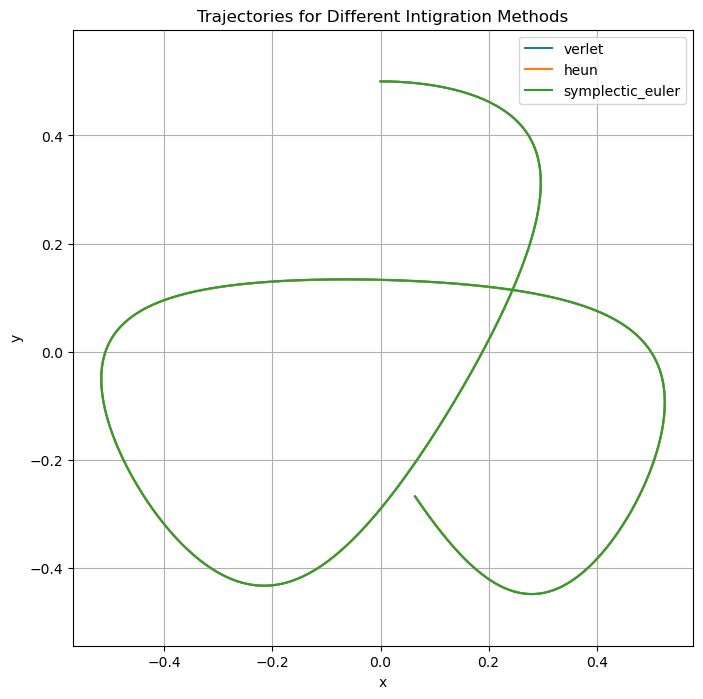

In [121]:
compare_integrators(Integrator, dt=dt, N=N)